## Exploratory Data Analysis

### 1. Analysis
1. Univariate Analysis
2. Multivariate Analysis

### 2. Feature Engineering
1. Creating new columns
2. Modifying existing ones

### 3. Handling Outliers
1. Detect Outliers
2. Remove Outliers


In [175]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# Importing the dataset
df=pd.read_csv(r"D:\College Items\AIADS 6th Sem\AI 2061 Data Visualization and Handling\eda-titanic-master\train.csv")

In [178]:
# Shape
df.shape

(891, 12)

In [179]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Categorical Columns

- Survived
- PClass
- Sex
- SibSp
- Parch
- Embarked

## Numerical Columns

- Age 
- Fare
- PassengerId

## Mixed Columns

- Name
- Ticket
- Cabin

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [182]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [183]:
# Few conclusions

# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop
# 3. Few columns have inappropriate data types

In [184]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [185]:
# Imputing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [186]:
# Imputing missing values for embarked
# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'].fillna('S', inplace=True)

In [187]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [188]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Changing data type for the following cols

- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [189]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [191]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [193]:
A = df['Survived']
print(A)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]


Out of 891 62 people died in the accident


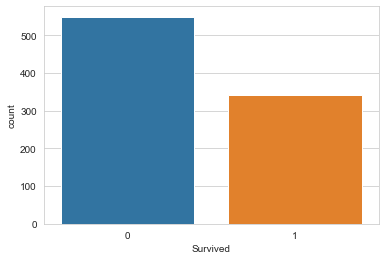

In [195]:
# Univariate Analysis

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 {} people died in the accident".format(death_percent))

In [196]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

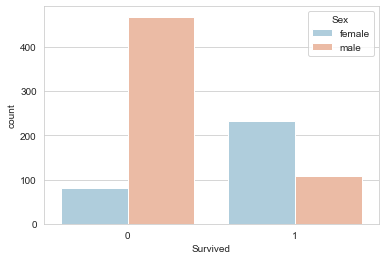

In [197]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

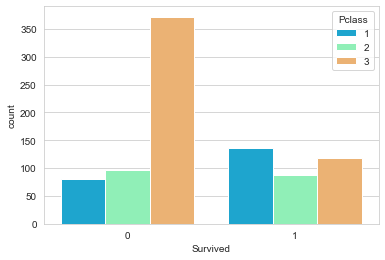

In [198]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:>

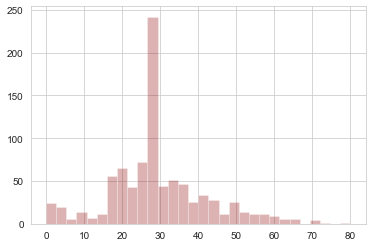

In [199]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

C:\Users\91782\AppData\Local\Temp/ipykernel_10932/3706489216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)


<AxesSubplot:xlabel='Age'>

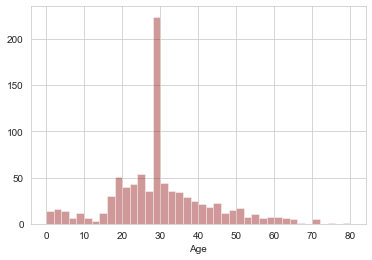

In [200]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

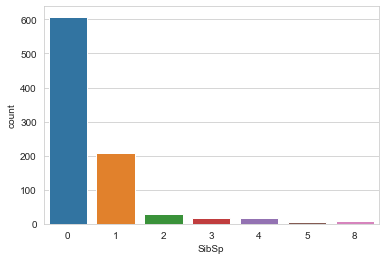

In [201]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

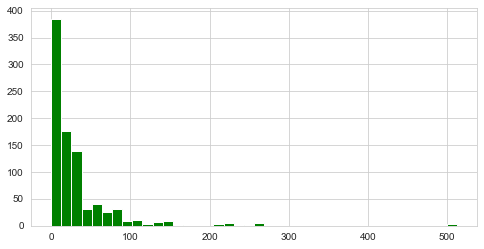

In [202]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))


# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

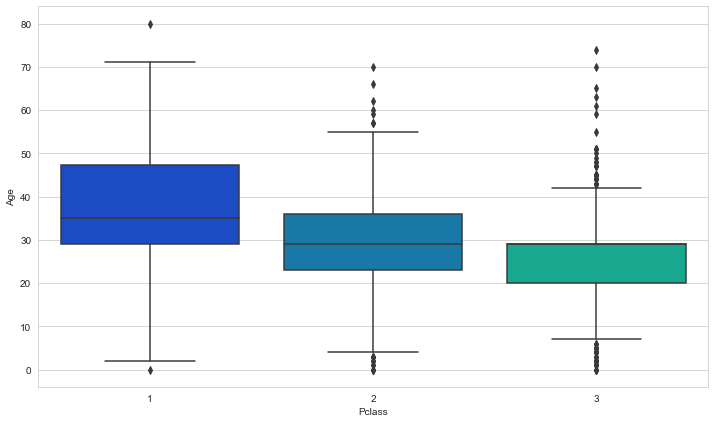

In [203]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [204]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [205]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

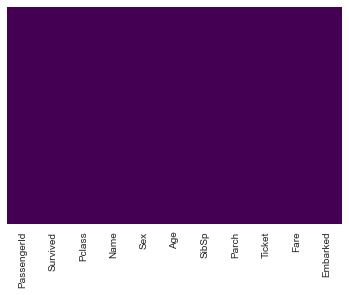

In [206]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [208]:
df.dropna(inplace=True)


# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 59.7+ KB


In [210]:
pd.get_dummies(df['Embarked'],drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [211]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [212]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [213]:
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22,1,0,7.2500
1,2,1,1,38,1,0,71.2833
2,3,1,3,26,0,0,7.9250
3,4,1,1,35,1,0,53.1000
4,5,0,3,35,0,0,8.0500


In [214]:
df = pd.concat([df,sex,embark],axis=1)


In [215]:
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,26,0,0,7.9250,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,1


# Building a Logistic Regression model
Let's start by splitting our data into a training set and test set.

# Train Test Split


In [216]:
train = df
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22,1,0,7.2500,1,0,1
1,2,1,38,1,0,71.2833,0,0,0
2,3,3,26,0,0,7.9250,0,0,1
3,4,1,35,1,0,53.1000,0,0,1
4,5,3,35,0,0,8.0500,1,0,1


In [217]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)


# Training and Predicting


In [220]:
from sklearn.linear_model import LogisticRegression


In [221]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

d:\Coding\Softwares\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [222]:
predictions = logmodel.predict(X_test)


In [223]:
from sklearn.metrics import confusion_matrix


In [224]:
accuracy=confusion_matrix(y_test,predictions)


In [225]:
accuracy


array([[133,  21],
       [ 42,  72]], dtype=int64)

In [226]:
from sklearn.metrics import accuracy_score


In [227]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7649253731343284

In [228]:
predictions


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# Evaluation

We can check precision,recall,f1-score using classification report!

In [229]:
from sklearn.metrics import classification_report

In [230]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.63      0.70       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



0.45956263424701577
0.9865867453652877


C:\Users\91782\AppData\Local\Temp/ipykernel_10932/747997586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


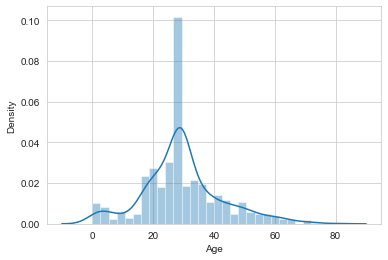

In [231]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

<AxesSubplot:>

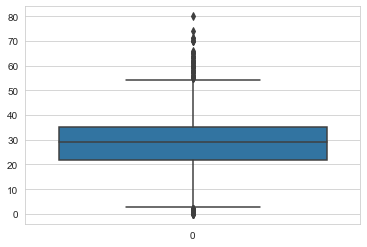

In [232]:
sns.boxplot(df['Age'])

In [233]:
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


## Conclusion

- For all practical purposes age can be cosidered as normal distribution
- Deeper analysis is required for outlier detection

C:\Users\91782\AppData\Local\Temp/ipykernel_10932/2942046018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<AxesSubplot:xlabel='Fare', ylabel='Density'>

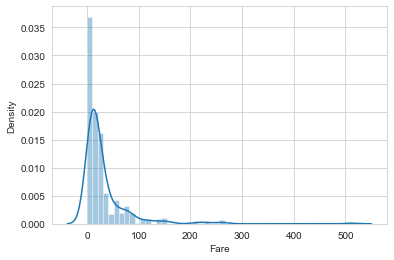

In [234]:
# Fare column
sns.distplot(df['Fare'])

In [235]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<AxesSubplot:>

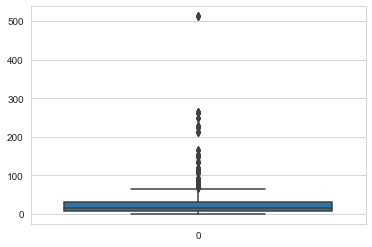

In [236]:
sns.boxplot(df['Fare'])

In [237]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


## Conclusion

- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data

C:\Users\91782\AppData\Local\Temp/ipykernel_10932/4035758269.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\91782\AppData\Local\Temp/ipykernel_10932/4035758269.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

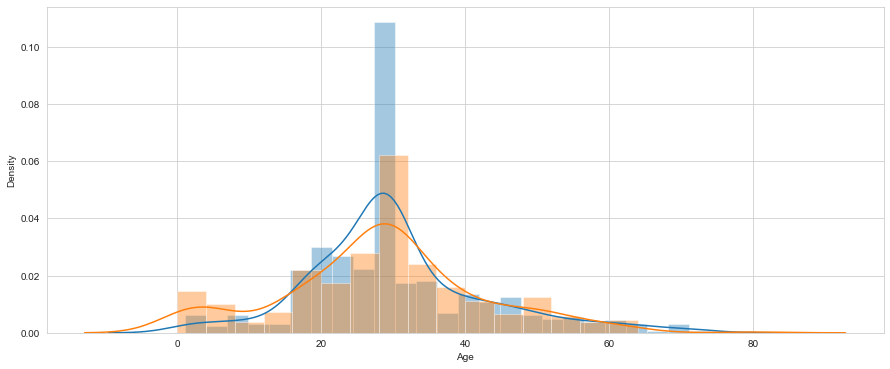

In [238]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\91782\AppData\Local\Temp/ipykernel_10932/1917301903.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
C:\Users\91782\AppData\Local\Temp/ipykernel_10932/1917301903.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<AxesSubplot:xlabel='Fare', ylabel='Density'>

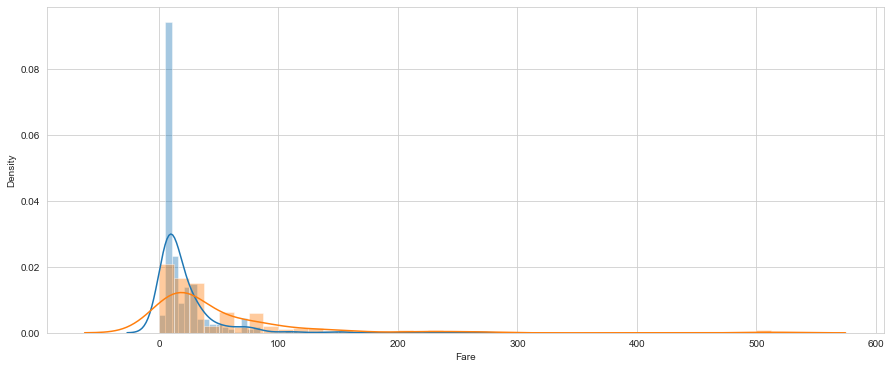

In [239]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

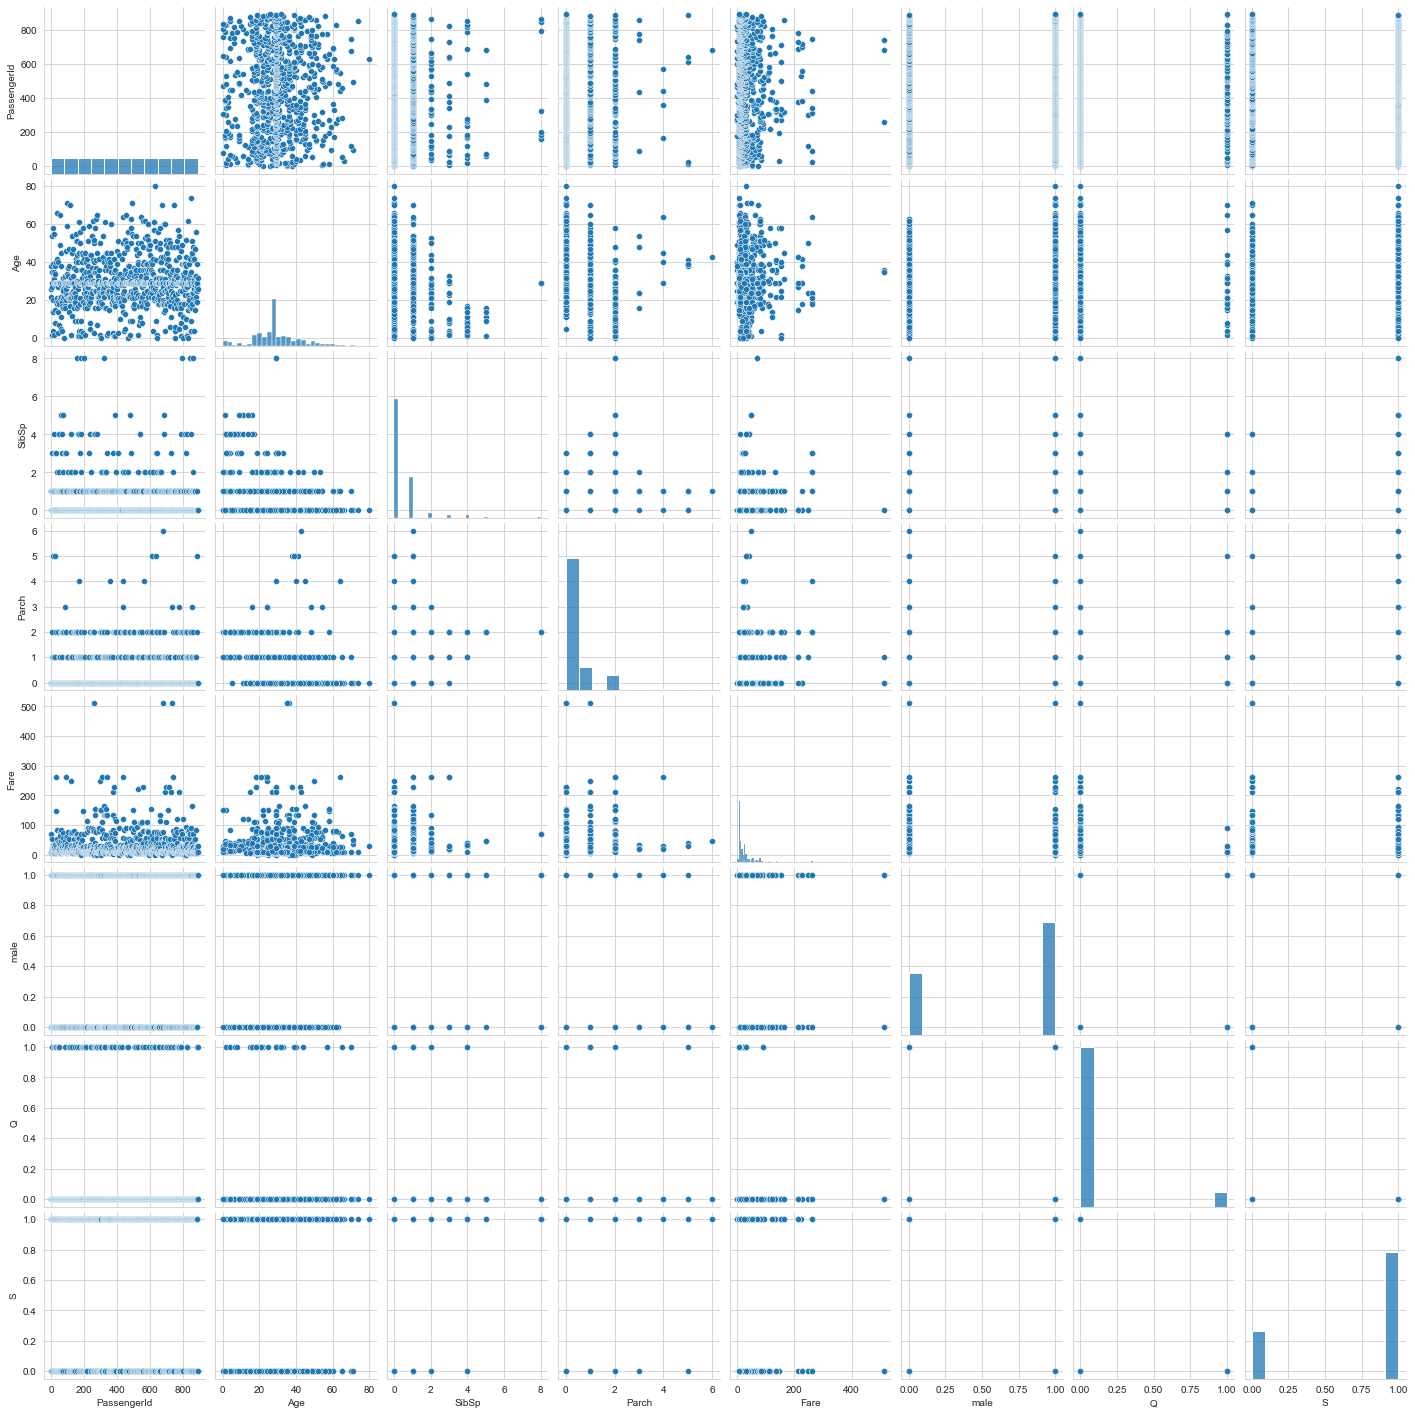

In [240]:
sns.pairplot(df)

d:\Coding\Softwares\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Coding\Softwares\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

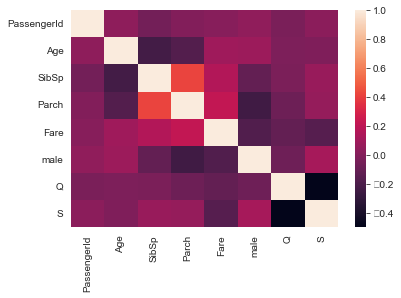

In [241]:
sns.heatmap(df.corr())

In [242]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [243]:
df.sample(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,family_size
504,505,1,1,16,0,0,86.5000,0,0,1,0
745,746,0,1,70,1,1,71.0000,1,0,1,2
24,25,0,3,8,3,1,21.0750,0,0,1,4
183,184,1,2,1,2,1,39.0000,1,0,1,3
821,822,1,3,27,0,0,8.6625,1,0,1,0


In [244]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [245]:
df['family_type']=df['family_size'].apply(family_type)

In [246]:
df.sample(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,family_size,family_type
644,645,1,3,0,2,1,19.2583,0,0,0,3,Medium
170,171,0,1,61,0,0,33.5000,1,0,1,0,Alone
617,618,0,3,26,1,0,16.1000,0,0,1,1,Medium
74,75,1,3,32,0,0,56.4958,1,0,1,0,Alone
47,48,1,3,29,0,0,7.7500,0,1,0,0,Alone


In [247]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [248]:
df.sample(5)

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S,family_type
425,426,0,3,29,7.2500,1,0,1,Alone
646,647,0,3,19,7.8958,1,0,1,Alone
308,309,0,2,30,24.0000,1,0,0,Medium
18,19,0,3,31,18.0000,0,0,1,Medium
769,770,0,3,32,8.3625,1,0,1,Alone


In [249]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


## Detecting outliers

### Numerical Data
- if the data is following normal distribution, anything beyond   3*SD - mean + 3*SD can be considered as an outlier
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

### Categorical data
- If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [250]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 9)

In [251]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

d:\Coding\Softwares\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Coding\Softwares\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

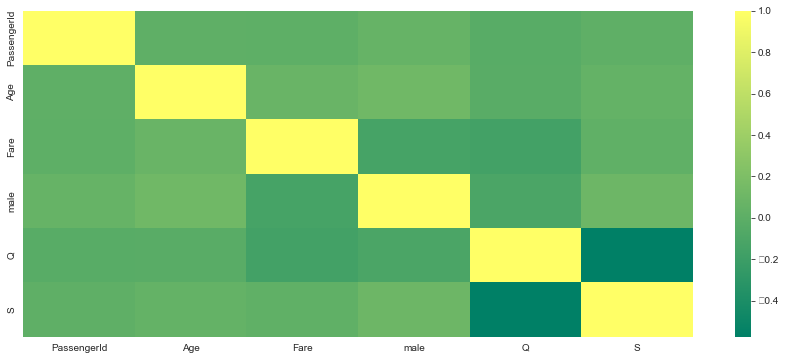

In [252]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer')

## Drawing Conclusions

- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone

## Communicating Results

- You can write a report/blog etc
- You can give a PPT in front of others
- You can describe the results face to face
